<a href="https://colab.research.google.com/github/jeancgarciaq/jeancgarciaq.github.io/blob/main/An%C3%A1lisisDatosDescriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE DATOS DESCRIPTIVO**

## **Problema:**

1. Contamos con una base de datos en formato csv con los salarios de los diferentes especialistas en el área de análisis de datos.
2. Se va a realizar análisis descriptivos de los datos, iniciando con una limpieza y normalización de los datos.
3. Se estarán creando visualizaciones gráficas de los datos.
4. Finalmente estableceremos algunas conclusiones sobre los patrones o variaciones observadas.
5. Queremos evaluar dos posibles hipótesis, la primera se basa en "al mayor nivel de experiencia y preparación de analista, mayor salario". Y la segunda es "el mejor salario se encuentra en los países más desarrollados económicamente".

# **Introducción**

Los salarios de los profesionales de la ciencia de datos son uno de los temas más atractivos y prácticos, que actualmente atrae una atención significativa para quienes estudian y trabajan en el campo de la ciencia de datos.

Este tema ayuda a las personas interesadas en la ciencia de datos a:

* Obtener una visión integral de los cambios en el campo desde 2020 hasta el presente.
* Comprender las tendencias globales actuales en materia de empleo y salarios en diversas profesiones.
* Acceder a información valiosa para ayudar a tomar decisiones informadas sobre las futuras direcciones profesionales.
* El conjunto de datos se obtiene de la comunidad global de ciencia de datos y se ha recopilado y actualizado continuamente desde 2020 hasta el presente.

## **Descripción de la columna:**

El conjunto de datos contiene una única tabla con 11 atributos y más de 37.000 filas de datos, con toda la información estructurada y descrita de la siguiente manera:

+ *work_year:* El año en que se pagó el salario
+ *experience_level:* El nivel de experiencia en el trabajo durante el año con los siguientes valores posibles
  + EN Nivel Nuevo
  + MI Nivel Junior a Medio
  + SE Nivel Senior Intermedio
  + EX Nivel Ejecutivo Experto / Director
+ *employment_type:* El tipo de empleo para el puesto
  + PT Tiempo parcial
  + FT Tiempo completo
  + CT Contrato
  + FL Autónomo
+ *job_title:* El puesto en el que se trabajó durante el año.
+ *salary:* El monto total del salario bruto pagado.
+ *salary_currency:* La moneda del salario pagado como código de moneda ISO 4217.
+ *salary_in_usd:* El salario en USD (tipo de cambio dividido por el tipo de cambio promedio en USD para el año respectivo a través de fxdata.foorilla.com.
+ *employee_residence:* País de residencia principal del empleado durante el año laboral como código de país ISO 3166.
+ *remote_ratio:* La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes
  + 0 Sin trabajo remoto (menos del 20 %)
  + 50 Parcialmente remoto
  + 100 Totalmente remoto (más del 80 %)
+ *company_location:* El país de la oficina principal del empleador o la sucursal contratante como código de país ISO 3166.
+ *company_size:* La cantidad promedio de personas que trabajaron para la empresa durante el año.
  + S Menos de 50 empleados (pequeña)
  + M De 50 a 250 empleados (mediana)
  + L Más de 250 empleados (grande)


In [1]:
# Install the opendatasets library using pip
!pip install opendatasets

#Importamos los datos utilizando opendatasets
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/lainguyn123/data-science-salary-landscape'
od.download('https://www.kaggle.com/datasets/lainguyn123/data-science-salary-landscape')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeancgarciaq
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lainguyn123/data-science-salary-landscape


100%|██████████| 235k/235k [00:00<00:00, 60.0MB/s]

Acabamos de utilizar la libreria `opedatasets` de Python para importar los datos que se encuentran en un fichero csv en la url indicada anteriormente.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The dataset was downloaded as a directory. Update the path to point to the actual CSV file within that directory
salaries_analyst_df = pd.read_csv("./data-science-salary-landscape/salaries.csv")

Se importaron las librerias que se van a utilizar en el Proyecto Pandas, Numpy, Matplotlib y Seaborn, asimismo, se convirtió el contenido del archivo CSV en un DataFrame de Pandas.

In [3]:
#Dataframe Pandas Original
salaries_analyst_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
37229,2024,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
37230,2024,SE,FT,Data Scientist,195500,USD,195500,US,100,US,M
37231,2024,SE,FT,Data Scientist,141300,USD,141300,US,100,US,M
37232,2024,SE,FT,Data Engineer,139810,USD,139810,US,0,US,M


Se puede observar de la data que contiene 11 columnas y 37.234 filas.

In [4]:
#Informacion técnica del DataFrame
salaries_analyst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


Se puede observar bastante integridad en la data, no existe ningún dato nulo, lo cual va a facilitar el análisis, ya que tenemos una data limpia.

In [5]:
#Información estadística del DataFrame
salaries_analyst_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,37234.000000,3.723400e+04,37234.000000,37234.000000
mean,2023.656443,1.667366e+05,160540.603105,23.197884
std,0.611469,2.338090e+05,72679.876280,42.005217
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


De los datos estadísticos obtenidos anteriormente se puede observar lo siguiente:
* La media del salario anual en dólares desde el 2020 a la presente fecha es de 160.540.
* La desviación estándar es de 72.679.
* El salario mínimo en dólares es de 15.000 anual.
* El percentil 25% en dólares es de 110.000.
* El percentil 50% en dólares es de 150.000.
* El percentil 75% en dólares es de 200.000.
* Mientras que el máximo en dólares fue de 800.000.

Éste resumen estadístico ya nos da una buena impresión de los salarios para los expertos en el área de la ciencia de datos.

In [6]:
#Análisis Estadistico General del Salario
salaries_analyst_df['salary_in_usd'].describe()

,salary_in_usd
count,37234.000000
mean,160540.603105
std,72679.876280
min,15000.000000
25%,110000.000000
50%,150000.000000
75%,200000.000000
max,800000.000000


Se ha realizado nuevamente el análisis estadistico pero basado solamente en el campo del salario en dólares, con el fin de estandarizar los datos ya que hay varias monedas involucradas en los datos, los resultados son los mismos que los anteriores el salario máximo es de 800.000 al año y el mínimo es de 15.000. Y la media es un salario de 160.540 y la deviación estándar es de 72.679, lo que nos indica que existe una fuerte diferencia entre los salarios de los diferentes profesionales, mientras algunos están ganando salarios abultados, otros tienen salarios muy bajos en comparación con los más altos. Sería interesante como un estudio futuro añadir otros profesionales IT para comparar los salarios con los especialistas en ciencias de datos.

# **Salarios durante el año 2020**

A continuación se analiza el comportamiento estadístico del salario en dólares durante el año 2020.

In [7]:
#Analisis estadistico del salario en dólares año 2020
salaries_analyst_df[salaries_analyst_df['work_year'] == 2020]['salary_in_usd'].describe()

,salary_in_usd
count,75.000000
mean,102250.866667
std,82722.309481
min,15000.000000
25%,47899.000000
50%,79833.000000
75%,117552.000000
max,450000.000000


En primer lugar, se debe decir que no existe suficiente información si lo comparamos con la cantidad total de filas que es 37.234, aquí solamente hay 75 filas que corresponden al año 2020. Al ser la muestra tan pequeña, los datos aquí no resultan confiables, sin embargo, se analiza esa pequeña muestra.

De estos datos se observa:
* Que el ingreso máximo es de 450.000 casi un 50% menos en comparación con los 800.000 del salario máximo en general.
* La mediana es de 102.250.
* La desviación estándar es de 82.722, a diferencia del cuadro general, aquí la desviación no está tan dispersa.
* El salario mínimo sigue siendo 15.000.

In [8]:
#Pais que mejor paga en dolares 2020
max_salaries_2020 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2020]['salary_in_usd'].max()
max_salary_country_2020 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2020]['employee_residence']
max_salary_country_2020 = pd.unique(max_salary_country_2020)
max_salary_country_2020

array(['US'], dtype=object)

Se puede observar que el país que mejor pagó en 2020 es Estados Unidos. Sin embargo, aquí tenemos un pequeño sesgo, porque existe un dato sumamente importante para determinar el mejor o peor salario, el cual tiene que ver con la posición que ocupa y el nivel de experiencia. Como los cargos que ocupan pueden ser muy variables, vamos a enfocarnos en los tres niveles de experiencia que existen en la data.

Ahora analicemos nuevamente el salario pero esta vez por el nivel de experiencia en el año 2020.

In [9]:
#mejor salario en el año 2020 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2020].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,250000
EX,325000
MI,450000
SE,412000


Para los nuevos analista de datos pueden aspirar un salario máximo de 250.000 al año, sin embargo, llama la atención que no son los Ejecutivos Expertos o Director quienes tuvieron el mejor salario en 2020 (325.000) sino los Junior o Nivel Intermedio alcanzaron a recibir pagas de hasta 450.000, seguidos de los Senior con 412.000.

Ahora observemos cuál el peor salario pagado durante el año 2020 de acuerdo a su nivel de experiencia.

In [10]:
#peor salario en el año 2020 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2020].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,15966
EX,15000
MI,20000
SE,33511


Como podemos ver aquí hasta los nuevos han superados a los Expertos Ejecutivos o Directores, si lo vemos es 15.966 versus 15.000, por su parte los Senior siguen teniendo mejor salario al ganar 33.511 frente a los 20.000 de los Junior o Nivel Intermedio.

Bien repitamos éste análisis por año. No sin antes conocer el país que peor pagó en 2020.

In [11]:
#Pais que peor paga en dolares 2020
min_salaries_2020 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2020]['salary_in_usd'].min()
min_salary_country_2020 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2020]['employee_residence']
min_salary_country_2020 = pd.unique(max_salary_country_2020)
min_salary_country_2020

array(['US'], dtype=object)

Nuevamente es Estados Unidos. Pero para despejar dudas, realicemos un listado de los países que participan en ésta data.

In [12]:
#paises en la data
salaries_analyst_df['employee_residence'].unique()

array(['MU', 'CA', 'US', 'DE', 'NG', 'PT', 'PK', 'HN', 'GR', 'FR', 'AT',
       'PH', 'ES', 'GB', 'MX', 'NL', 'AE', 'JP', 'HU', 'NZ', 'IN', 'PL',
       'DK', 'IT', 'RU', 'HR', 'GH', 'SG', 'AS', 'AU', 'TH', 'SI', 'CZ',
       'BR', 'VN', 'IQ', 'BE', 'BG', 'JE', 'TR', 'PR', 'RS', 'CO', 'RO',
       'CL', 'HK', 'MD', 'LU', 'MT', 'IE', 'IL', 'CH', 'UZ', 'LT', 'IR',
       'CN', 'CR', 'FI', 'BO', 'DO', 'AR', 'EG', 'ID', 'MY', 'EE', 'TN',
       'DZ', 'OM', 'ZA', 'UA', 'UG', 'LV', 'AM', 'KR', 'QA', 'KE', 'AD',
       'EC', 'PE', 'SA', 'NO', 'GE', 'CF', 'SE', 'KW', 'CY', 'BA', 'VE',
       'SK', 'BM', 'LB'], dtype=object)

Ahora si quedó listo el año 2020, hagamos lo propio por el año 2021. Iniciemos con los datos estadísticos de éste año.

In [13]:
#datos estadisticos del salario en dólares año 2021
salaries_analyst_df[salaries_analyst_df['work_year'] == 2021]['salary_in_usd'].describe()

,salary_in_usd
count,218.000000
mean,99922.073394
std,67072.030451
min,15000.000000
25%,54094.000000
50%,83872.000000
75%,138750.000000
max,423000.000000


Tenemos los siguientes datos basado en el salario en dólares:

* Salario más alto es de 423.000.
* Salario más bajo sigue siendo de 15.000.
* La media es de 99.922.
* Y la desviación es de 67.072, la cual es relativamente similar a la del año anterior.

Al igual que el anterior año la data sigue siendo pequeña en comparación con las 37.000 filas aproximadamente, aquí solo hay 218.

Sin embargo, continuamos analizando ésta pequeña muestra, observemos los países que mejor o peor pagan.

In [14]:
#Pais que mejor paga en dolares 2021
max_salaries_2021 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2021]['salary_in_usd'].max()
max_salary_country_2021 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2021]['employee_residence']
max_salary_country_2021 = pd.unique(max_salary_country_2020)
max_salary_country_2021

array(['US'], dtype=object)

Sigue Estados Unidos ofreciendo el mejor salario. Veamos ahora el mínimo.

In [15]:
#Pais que peor paga en dolares 2021
min_salaries_2021 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2021]['salary_in_usd'].min()
min_salary_country_2021 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2021]['employee_residence']
min_salary_country_2021 = pd.unique(max_salary_country_2021)
min_salary_country_2021

array(['US'], dtype=object)

Hasta ahora no se ha encontrado una variación. Ahora veamos el mejor salario por experiencia.

In [16]:
#mejor salario en el año 2021 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2021].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,225000
EX,416000
MI,423000
SE,276000


En éste año, es evidente la mejora en los salarios en general y también se observa como los mejores pagados fueron los Directores o Ejecutivos Expertos y los Junior o Intermedio, con 416.000 y 423.000 respectivamente, mientras que los niveles de experiencia nuevo y senior, obtuvieron 225.000 y 276.000 respectivamente.

Veamos el peor por nivel de experiencia.

In [17]:
#peor salario en el año 2021 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2021].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,15000
EX,69741
MI,16904
SE,18907


Hasta ahora hemos podido ver que el salario anual mínimo de un nuevo no baja de 15.000, sin embargo, aquí si hay una distinción clara de los Ejecutivos Expertos o Directores con respecto a los demás, ya que sus ingresos mínimos anual es de 69.741. Mientras que los Junior o Nivel intermedio y los Senior, ganaron 16.904 y 18.907 respectivamente.

Hagamos los propio con el año 2022, año en que seguramente la data debe ser mucho más abudante que los dos años anteriores.

Empecemos con la estadística general del año 2022.

In [18]:
#estadistica general del salario en dolares del año 2022
salaries_analyst_df[salaries_analyst_df['work_year'] == 2022]['salary_in_usd'].describe()

,salary_in_usd
count,1658.000000
mean,134215.089867
std,57794.655360
min,15000.000000
25%,95000.000000
50%,131526.000000
75%,172200.000000
max,430967.000000


Se observa un cambio en la cantidad de datos con respecto al año anterior, ya que aquí contamos con 1.658 filas.

* El salario máximo anual es de 430.967.
* El salario mínimo se mantiene en 15.000.
* La media es de 134.215.
* Mientras que la varianza estándar es de 57.794.

Analicemos con detenimiento éste año, qué país es el que mejor o peor paga.

In [19]:
#Pais que mejor paga en dolares 2022
max_salaries_2022 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2022]['salary_in_usd'].max()
max_salary_country_2022 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2022]['employee_residence']
max_salary_country_2022 = pd.unique(max_salary_country_2022)
max_salary_country_2022

array(['GB'], dtype=object)

Acabamos de tener un cambio, ya que el país que mejor pagó en el 2022 fue Gran Bretaña.

In [20]:
#Pais que peor paga en dolares 2022
min_salaries_2022 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2022]['salary_in_usd'].min()
min_salary_country_2022 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2022]['employee_residence']
min_salary_country_2022 = pd.unique(max_salary_country_2022)
min_salary_country_2022

array(['GB'], dtype=object)

Y lo mismo sucedió con la peor paga, corresponde a Gran Bretaña.

Ahora veamos cómo fueron los salarios de acuerdo al nivel de experiencia en éste año.

In [21]:
#mejor salario en el año 2022 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2022].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,200000
EX,324000
MI,430967
SE,405000


El salario de los nuevos y los directores ejecutivos bajaron en comparación con el año anterior, mientras que los salarios de los Juniors y los Seniors se incrementó en éste año. Respectivamente, 200.000, 324.000, 430.967 y 405.000 dólares anual.

Veamos ahora los mínimos de acuerdo a su nivel de experiencia.

In [22]:
#peor salario en el año 2022 de acuerdo al nivel de experiencia
salaries_analyst_df[salaries_analyst_df['work_year'] == 2022].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,15000
EX,76309
MI,15000
SE,25000


En éste año los Nuevos y los Medios recibieron el pago mínimo, mientras que los Directores o Ejecutivos Expertos siguen siendo mejor pagados 76.309 cuando de peor pago se trata. Y los Seniors recibieron por su parte 25.000 al año.

Ahora hagamos lo propio por el año 2023. Empecemos con su estadística general

In [23]:
#datos estadisticos general del año 2023
salaries_analyst_df[salaries_analyst_df['work_year'] == 2023]['salary_in_usd'].describe()

,salary_in_usd
count,8522.000000
mean,153700.755456
std,65386.667989
min,15680.000000
25%,109248.500000
50%,145000.000000
75%,190000.000000
max,750000.000000


Lo primero que podemos observar es el cambio radical en la cantidad de data, aquí está compuesta por 8.522 filas y eso hace la diferencia.

Sin lugar a dudas, en el 2023 el impacto del salario fue increíble, casi se duplica el máximo.

* Salario máximo anual es de 750.000
* El salario mínimo es 15.680 una variación pequeña con respecto a los años anteriores se puede decir que de un 4% aproximadante.
* La media es de 153.700
* Pero la desviación estándar si que es notable ya que se ubica en 65.386. Se podría decir que hay una desviación importante con respecto a la media.

Bien analicemos con detenimiento éste año, veamos cuál el país que mejor y peor paga.

In [24]:
#pais que mejor paga salario en dolares año 2023
max_salaries_2023 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2023]['salary_in_usd'].max()
max_salary_country_2023 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2023]['employee_residence']
max_salary_country_2023 = pd.unique(max_salary_country_2023)
max_salary_country_2023

array(['US'], dtype=object)

In [25]:
#pais que peor paga salario en dolares año 2023
min_salaries_2023 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2023]['salary_in_usd'].min()
min_salary_country_2023 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == min_salaries_2023]['employee_residence']
min_salary_country_2023 = pd.unique(min_salary_country_2023)
min_salary_country_2023

array(['PH'], dtype=object)

El peor salario, lo encontramos en Filipinas, éste año.

Ahora veamos los mejores salarios de acuerdo al nivel de experiencia.

In [26]:
#Mejor salario en dolares de acuerdo al nivel de experiencia en el 2023
salaries_analyst_df[salaries_analyst_df['work_year'] == 2023].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,350000
EX,465000
MI,750000
SE,750000


Aquí ha ocurrido un dato que puede sorprender pero lo que observamos es que tanto los niveles Intermedios o Juniors como los Seniors se han quedado con el mejor salario anual (750.000), seguidos de los directores o expertos ejecutivos que recibieron 465.000, pero los nuevos también mejoraron bastante con respecto al año anterior llegaron a 350.000 al año.

In [27]:
#Peor salario de acuerdo al nivel de experiencia en el año 2023
salaries_analyst_df[salaries_analyst_df['work_year'] == 2023].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,16000
EX,55000
MI,15680
SE,15809


Siempre los datos, nos van a mostrar cosas sorprendentes, y aquí vemos los niveles intermedios empobrecidos, inclusive tanto los Junior como los Seniors fueron peores pagados (15.680 y 15.809 respectivamente) con respecto a los nuevos (16.000), mientras que los directores o ejecutivos expertos siempre reciben una mejor paga con respecto a los otros niveles de experiencia (55.000 anual).

Al momento de realizar éste análisis, estabamos inicial el mes de Septiembre del año 2024, veamos cómo ha ido evolucionando el salario éste año para ir cerrando nuestras observaciones sobre la data.

In [28]:
#Estadistica general del año 2024
salaries_analyst_df[salaries_analyst_df['work_year'] == 2024]['salary_in_usd'].describe()

,salary_in_usd
count,26761.000000
mean,165006.932925
std,74892.213198
min,16000.000000
25%,112000.000000
50%,153000.000000
75%,205000.000000
max,800000.000000


Tenemos un buen número de filas aquí, en total 26.761. Mayor cantidad de datos que la suma de todos los años anteriores. Se puede observar lo siguiente:

* El salario máximo anual es de 800.000, lo cual indica un incremento con respecto al año anterior.
* El salario mínimo fue de 16.000.
* La media es de 165.006 mientras que la desviación es de 74.892. Sigue siendo alta.

Ahora, como siempre busquemos el ganador, el país que mejor paga ofreció:

In [29]:
#Pais que ofrecio mejor salario en dolares anual 2024
max_salaries_2024 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2024]['salary_in_usd'].max()
max_salary_country_2024 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == max_salaries_2024]['employee_residence']
max_salary_country_2024 = pd.unique(max_salary_country_2024)
max_salary_country_2024

array(['CA'], dtype=object)

Y el ganador en el año 2024 es Canada, hasta la presente fecha. Veamos el que peor paga ahora.

In [30]:
#Pais que ofreció el peor salario en dolares anual 2024
min_salaries_2024 = salaries_analyst_df[salaries_analyst_df['work_year'] == 2024]['salary_in_usd'].min()
min_salary_country_2024 = salaries_analyst_df[salaries_analyst_df['salary_in_usd'] == min_salaries_2024]['employee_residence']
min_salary_country_2024 = pd.unique(min_salary_country_2024)
min_salary_country_2024

array(['EC', 'GR', 'PH', 'AM'], dtype=object)

Los datos siempre nos van a sorprender, en éste año, tenemos más de un país disputándose ese puesto: Ecuador, Grecia, Filipinas y Armenia.

Veamos qué tal nos va con los niveles de experiencia y sus salarios.

In [31]:
#Mejor salario anual en dólares de acuerdo al nivel de experiencia 2024
salaries_analyst_df[salaries_analyst_df['work_year'] == 2024].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,774000
EX,526400
MI,800000
SE,750000


Podemos ver como hasta ahora el salario se mantiene en los Junior o Intemedios como el mejor pagado (800.000), seguido de los nuevos (774.000), los Seniors (750.000) y finalmente los ejecutivos expertos (526.000).

Ahora veamos esos peores salarios de acuerdo al nivel de experiencia.

In [32]:
#Peor salario anual en dólares de acuerdo al nivel de experiencia 2024
salaries_analyst_df[salaries_analyst_df['work_year'] == 2024].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,16000
EX,41500
MI,16000
SE,18000


En éste caso los nuevos y los Junior o Intermedios tienen el mismo salario (16.000), mientras que los Seniors están en 18.000, sin embargo, los Directores o Ejecutivos Expertos están en 41.500.

Ahora bien, aquí tenemos que establecer una comparación importante y es la siguiente, el año 2024 no ha terminado, así que éstas conclusiones no son definitivas con respecto a éste año.

Vamos a realizar un giro importante, y es que hasta ahora, hemos analizado por año, por experiencia pero no hemos considerando una tercera variable que también es importante evaluar con respecto a los salarios y es el caso de los trabajos remotos, híbridos versus los presenciales.

Veamos que tipos de trabajos están presentes en la data.

In [33]:
#Trabajos remotos
trabajo_remoto = salaries_analyst_df['remote_ratio'] == 100
jobs_remote_df = salaries_analyst_df[trabajo_remoto]
jobs_remote_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8509 entries, 4 to 37231
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8509 non-null   int64 
 1   experience_level    8509 non-null   object
 2   employment_type     8509 non-null   object
 3   job_title           8509 non-null   object
 4   salary              8509 non-null   int64 
 5   salary_currency     8509 non-null   object
 6   salary_in_usd       8509 non-null   int64 
 7   employee_residence  8509 non-null   object
 8   remote_ratio        8509 non-null   int64 
 9   company_location    8509 non-null   object
 10  company_size        8509 non-null   object
dtypes: int64(4), object(7)
memory usage: 797.7+ KB


Ahora podemos observar que el de total de la data, existen 8509 filas que califican como trabajo remoto, vamos analizar estos datos por año para obtener los salarios de los trabajos remotos y luego realizar la comparación con los trabajos híbridos y los presencial o que contiene un 20% o menos de trabajo remoto.

In [34]:
jobs_remote_df['salary_in_usd'].describe()

,salary_in_usd
count,8509.000000
mean,149823.089317
std,63560.815568
min,15000.000000
25%,105000.000000
50%,145000.000000
75%,186600.000000
max,800000.000000


Podemos ver que los trabajos remotos también cuenta con buenos salarios, de hecho se puede observar que:

* Máximo salario anual es de 800.000.
* El mínimo sigue siendo de 15.000.
* La media es de 149.823.
* Y la variación estándar está en 63.560, una desviación bastante significativa, diriamos que hay una dispersión importante con respecto a la media.

En los trabajos remotos, vamos a concentrarnos solamente en lo que va del año 2024.

In [35]:
#Pais con salario maximo en trabajo remoto 2024
max_salaries_remote_2024 = jobs_remote_df[jobs_remote_df['work_year'] == 2024]['salary_in_usd'].max()
max_salary_country_remote_2024 = jobs_remote_df[jobs_remote_df['salary_in_usd'] == max_salaries_remote_2024]['employee_residence']
max_salary_country_remote_2024 = pd.unique(max_salary_country_remote_2024)
max_salary_country_remote_2024

array(['CA'], dtype=object)

Canadá es el país que ofrece el mejor salario en trabajo remoto. Ahora veamos el país que ofrece el salario más bajo.

In [36]:
#Pais con salario minimo en trabajo remoto 2024
min_salaries_remote_2024 = jobs_remote_df[jobs_remote_df['work_year'] == 2024]['salary_in_usd'].min()
min_salary_country_remote_2024 = jobs_remote_df[jobs_remote_df['salary_in_usd'] == min_salaries_remote_2024]['employee_residence']
min_salary_country_remote_2024 = pd.unique(min_salary_country_remote_2024)
min_salary_country_remote_2024

array(['EC', 'GR', 'PH', 'AM'], dtype=object)

Los países que ofrecen trabajo remoto con los salarios más bajos son Ecuador, Grecia, Filipinas y Armenia.

Ahora veamos el salario de acuerdo al nivel de experiencia.

In [37]:
#Salario máximo en trabajos remotos de acuerdo al nivel de experiencia 2024
jobs_remote_df[jobs_remote_df['work_year'] == 2024].groupby('experience_level')['salary_in_usd'].max()

,salary_in_usd
experience_level,
EN,300000
EX,448000
MI,800000
SE,720000


Podemos comprobar que los salarios son competitivos, inclusive los nuevos pueden llegar a obtener salarios de 300.000.

Ahora veamos el salario mínimo.

In [38]:
#Salario mínimo en trabajos remotos de acuerdo al nivel de experiencia 2024
jobs_remote_df[jobs_remote_df['work_year'] == 2024].groupby('experience_level')['salary_in_usd'].min()

,salary_in_usd
experience_level,
EN,16000
EX,45000
MI,16000
SE,21000


Los resultados no son tan diferentes al estudio general que ya habíamos realizado.

Ahora, veamos los 10 cargos mejores pagados.

In [39]:
#10 Cargos con el mejor salario en dólares
salaries_analyst_df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False).head(10)

,salary_in_usd
job_title,
AI Architect,800000
Data Analyst,774000
Data Engineer,750000
Machine Learning Scientist,750000
Machine Learning Engineer,750000
Data Scientist,750000
Analytics Engineer,750000
Research Engineer,720000
Research Scientist,720000


Y ahora también los 10 cargos con el peor salario de toda la data.

In [40]:
#10 Cargos con el peor salario en dólares
salaries_analyst_df.groupby('job_title')['salary_in_usd'].min().sort_values(ascending=True).head(10)

,salary_in_usd
job_title,
Business Intelligence Developer,15000
Data Analyst,15000
Staff Data Analyst,15000
Machine Learning Developer,15000
Software Development Engineer,15129
Computer Vision Engineer,15897
Machine Learning Engineer,15966
AI Engineer,16000
Data Scientist,16000


Es evidente que el Analista de Datos ocupa un puesto importante en el ecosistema de los datos, lo vemos ocupando el segundo lugar de forma consistente tanto en los mejores salarios como en los peores salarios.

Ya para finalizar las observaciones a nuestros datos, realicemos una comparación de los salarios en relación con el tamaño de las compañías, para que tengamos una idea, refresquemos ese dato con una serie.

In [41]:
#Tamaño de las compañías
salaries_analyst_df['company_size'].unique()

array(['S', 'L', 'M'], dtype=object)

Las compañias están calificadas en grandes (M), medianas (L) y pequeñas (S).

Observemos el salario en dichas compañias.

In [42]:
#Salario en dólares en las compañías pequeñas
salaries_analyst_df[salaries_analyst_df['company_size'] == 'S']['salary_in_usd'].describe()

,salary_in_usd
count,200.000000
mean,88036.290000
std,57768.696752
min,15809.000000
25%,50000.000000
50%,75324.000000
75%,115828.250000
max,416000.000000


En la data contamos con el registro de 200 filas de compañías que se podría calificar como pequeñas y entre los años 2020 al 2024, los salarios en dólares han sido así:

* Máximo 416.000.
* Mínimo 15.809.
* Media 88.036.
* Desviación 57.768.

In [43]:
#Salario en dólares en las compañías medianas
salaries_analyst_df[salaries_analyst_df['company_size'] == 'M']['salary_in_usd'].describe()

,salary_in_usd
count,35583.000000
mean,161471.457634
std,72588.260419
min,15000.000000
25%,110004.000000
50%,150000.000000
75%,200000.000000
max,800000.000000


Existen 35.583 compañías que se pueden calificar como medianas, los salarios entre los años 2020 al 2024 tuvieron las siguientes características:

* Máximo 800.000.
* Mínimo 15.000.
* Media 161.471.
* Desviación 72.588.

In [44]:
#Salarios en dólares en compañías grandes
salaries_analyst_df[salaries_analyst_df['company_size'] == 'L']['salary_in_usd'].describe()

,salary_in_usd
count,1451.000000
mean,147706.878704
std,70512.600243
min,15000.000000
25%,96197.500000
50%,136000.000000
75%,205600.000000
max,423000.000000


Contamos con un registro de 1.451 compañías que califican como grandes, entre los años 2020 y lo que va del año 2024, los salarios han tenido los siguientes comportamientos:

* Máximo 423.000.
* Mínimo 15.000.
* Mediana 147.706.
* Desviación 70.512.

Por increíble que parezca estos datos, son con los que se cuenta actualmente, podemos observar como las compañías medianas cuenta con mejores salarios que las compañías grandes.

# **Presentación Visual de los Datos**

Ya que hemos realizado un análisis de casi todos los aspectos de la data, dando cumplimiento al análisis de datos descriptivo, vamos a graficar algunos datos que nos parece se vería mejor en forma gráfica.

Empecemos con el dato principal que hemos estado estudian y vamos a ver la evolución de los salarios por experiencia a lo largo del período de estos casi 4 años.

## **Evolución del Salario en Dólares de acuerdo al nivel de experiencia**

Para graficar esto, vamos a intentar realizar un gráfico de línea, donde en el eje Y vamos a colocar el valor en dólares y en el eje Y los años, luego colocaremos las 4 líneas de los Nuevos, Juniors, Seniors y Ejecutivos Expertos.

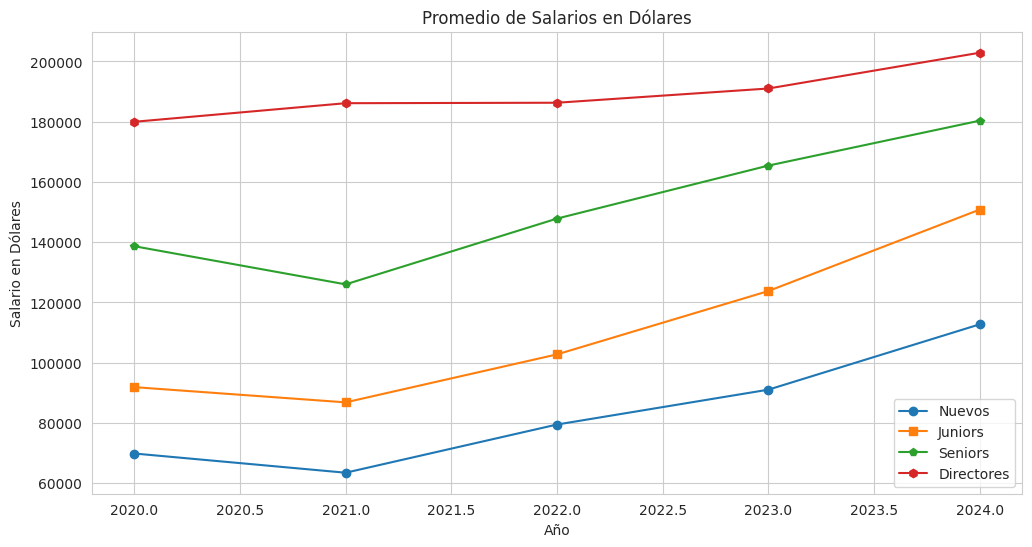

In [45]:
# Grafico de Salarios en Dólares por Años basado en la experiencia
years = salaries_analyst_df['work_year'].unique()

# Calculate the average salary for newbies for each year
salaries_newbies = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EN'].groupby('work_year')['salary_in_usd'].mean()

# Calculate the average salary for juniors for each year
salaries_juniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'MI'].groupby('work_year')['salary_in_usd'].mean()

# Calculate the average salary for seniors for each year
salaries_seniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'SE'].groupby('work_year')['salary_in_usd'].mean()

# Calculate the average salary for directors for each year
salaries_directors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EX'].groupby('work_year')['salary_in_usd'].mean()

#Estilos seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(years, salaries_newbies, marker="o")
plt.plot(years, salaries_juniors, marker="s")
plt.plot(years, salaries_seniors, marker="p")
plt.plot(years, salaries_directors, marker="h")

plt.xlabel('Año')
plt.ylabel('Salario en Dólares')

plt.title("Promedio de Salarios en Dólares")
plt.legend(['Nuevos', 'Juniors', 'Seniors', 'Directores']);

Ahora veamos gráficamente los salarios no solamente considerando la media, sino también el salario máximo y el salario mínimo.

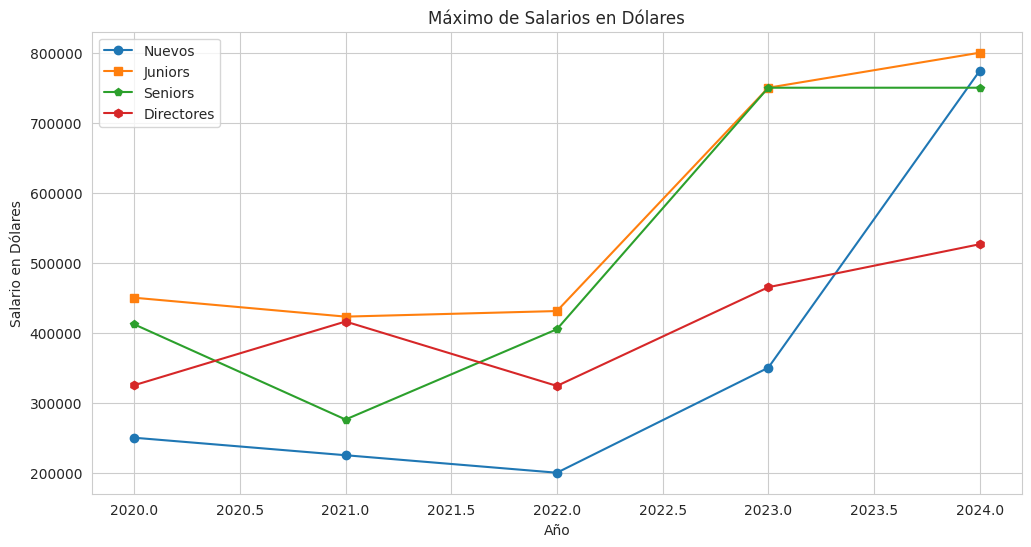

In [46]:
# Grafico de Salarios en Dólares por Años basado en la experiencia
years = salaries_analyst_df['work_year'].unique()

# Calculate the max salary for newbies for each year
salaries_newbies = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EN'].groupby('work_year')['salary_in_usd'].max()

# Calculate the max salary for juniors for each year
salaries_juniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'MI'].groupby('work_year')['salary_in_usd'].max()

# Calculate the max salary for seniors for each year
salaries_seniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'SE'].groupby('work_year')['salary_in_usd'].max()

# Calculate the max salary for directors for each year
salaries_directors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EX'].groupby('work_year')['salary_in_usd'].max()

#Estilos seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(years, salaries_newbies, marker="o")
plt.plot(years, salaries_juniors, marker="s")
plt.plot(years, salaries_seniors, marker="p")
plt.plot(years, salaries_directors, marker="h")

plt.xlabel('Año')
plt.ylabel('Salario en Dólares')

plt.title("Máximo de Salarios en Dólares")
plt.legend(['Nuevos', 'Juniors', 'Seniors', 'Directores']);

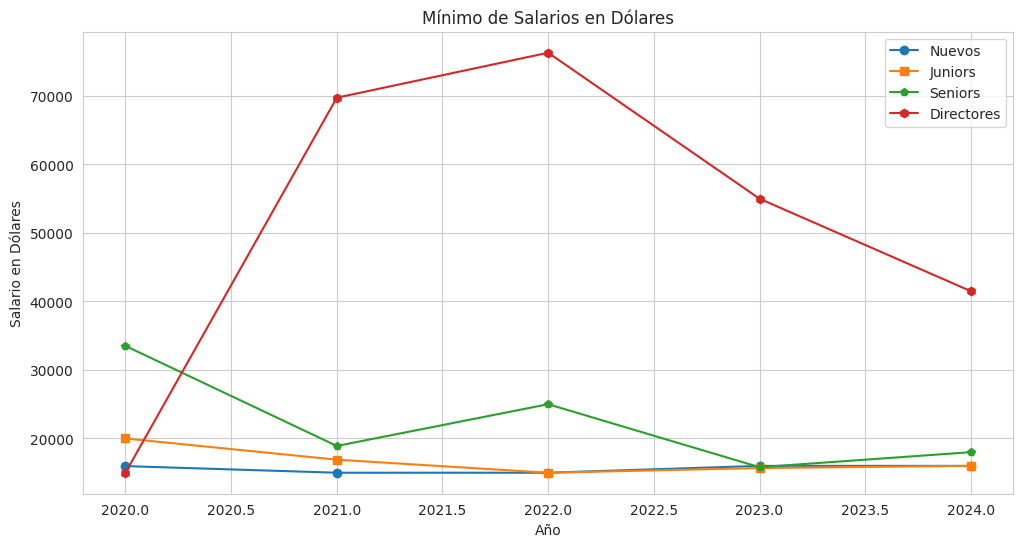

In [47]:
# Grafico de Salarios en Dólares por Años basado en la experiencia
years = salaries_analyst_df['work_year'].unique()

# Calculate the average salary for newbies for each year
salaries_newbies = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EN'].groupby('work_year')['salary_in_usd'].min()

# Calculate the average salary for juniors for each year
salaries_juniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'MI'].groupby('work_year')['salary_in_usd'].min()

# Calculate the average salary for seniors for each year
salaries_seniors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'SE'].groupby('work_year')['salary_in_usd'].min()

# Calculate the average salary for directors for each year
salaries_directors = salaries_analyst_df[salaries_analyst_df['experience_level'] == 'EX'].groupby('work_year')['salary_in_usd'].min()

#Estilos seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(years, salaries_newbies, marker="o")
plt.plot(years, salaries_juniors, marker="s")
plt.plot(years, salaries_seniors, marker="p")
plt.plot(years, salaries_directors, marker="h")

plt.xlabel('Año')
plt.ylabel('Salario en Dólares')

plt.title("Mínimo de Salarios en Dólares")
plt.legend(['Nuevos', 'Juniors', 'Seniors', 'Directores']);

Ahora veamos los salarios por años para los diferentes cargos que ofrece el ecosistema de datos.

Text(0, 0.5, 'Cargo')

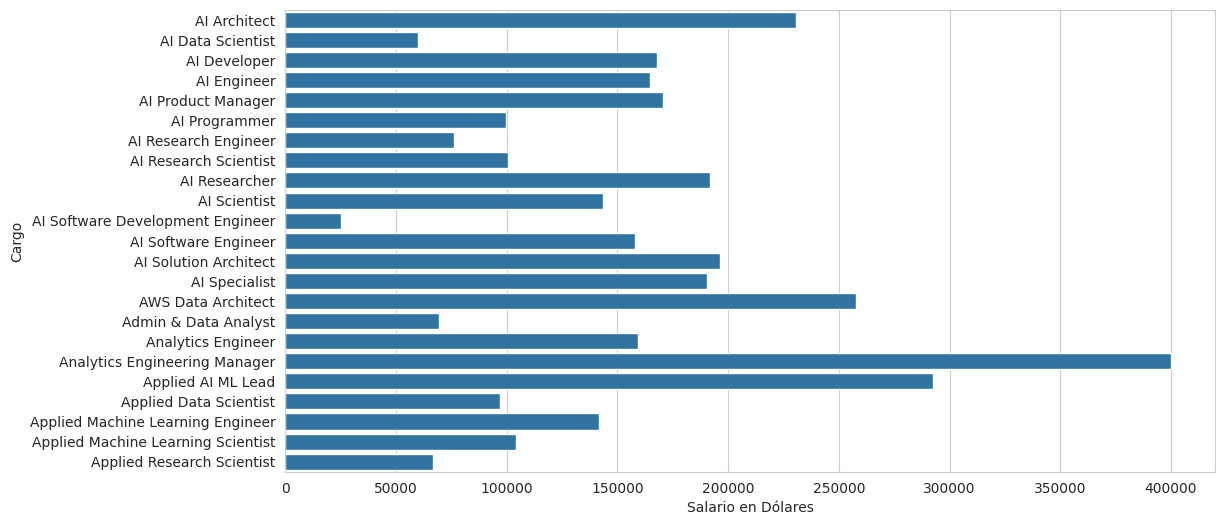

In [48]:
#Grafico de salarios por cargo

#Salarios
salarios_cargos = salaries_analyst_df.groupby('job_title')['salary_in_usd'].mean()

# Get a list of unique job titles
job_titles = salarios_cargos.index.tolist()

# Calculate the number of job titles
n = len(job_titles)

# Divide the job titles into 9 groups (adjust as needed)
group_size = n // 9

# Create slices based on job titles
salarios1 = salarios_cargos.loc[job_titles[0:group_size]]
salarios2 = salarios_cargos.loc[job_titles[group_size:2 * group_size]]
salarios3 = salarios_cargos.loc[job_titles[2 * group_size:3 * group_size]]
salarios4 = salarios_cargos.loc[job_titles[3 * group_size:4 * group_size]]
salarios5 = salarios_cargos.loc[job_titles[4 * group_size:5 * group_size]]
salarios6 = salarios_cargos.loc[job_titles[5 * group_size:6 * group_size]]
salarios7 = salarios_cargos.loc[job_titles[6 * group_size:7 * group_size]]
salarios8 = salarios_cargos.loc[job_titles[7 * group_size:8 * group_size]]
salarios9 = salarios_cargos.loc[job_titles[8 * group_size:]]

# Convert the Series to DataFrame and reset the index
salarios1 = salarios1.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios1);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

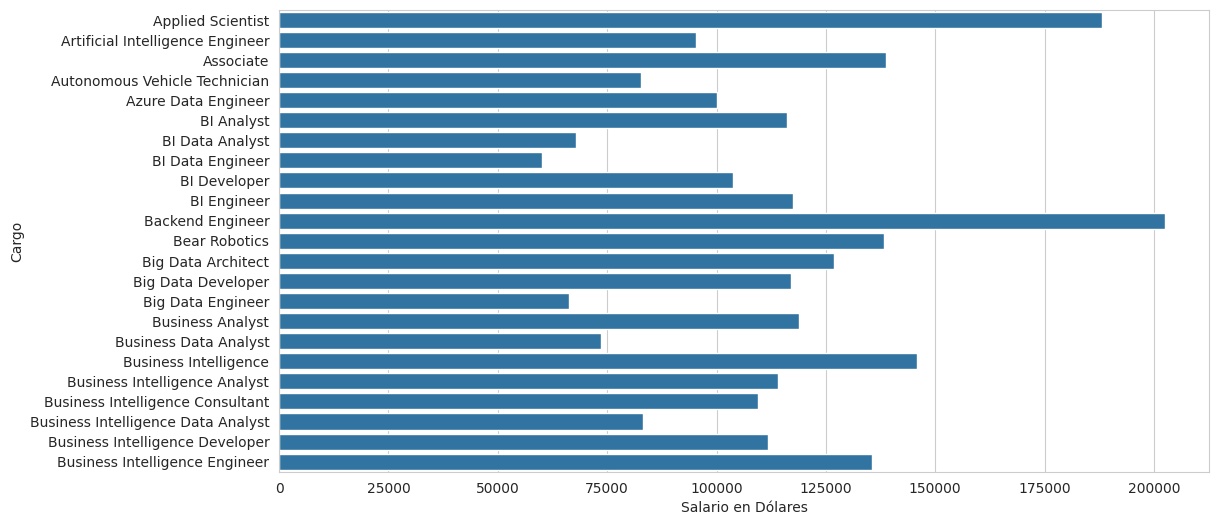

In [49]:
# Convert the Series to DataFrame and reset the index
salarios2 = salarios2.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios2);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

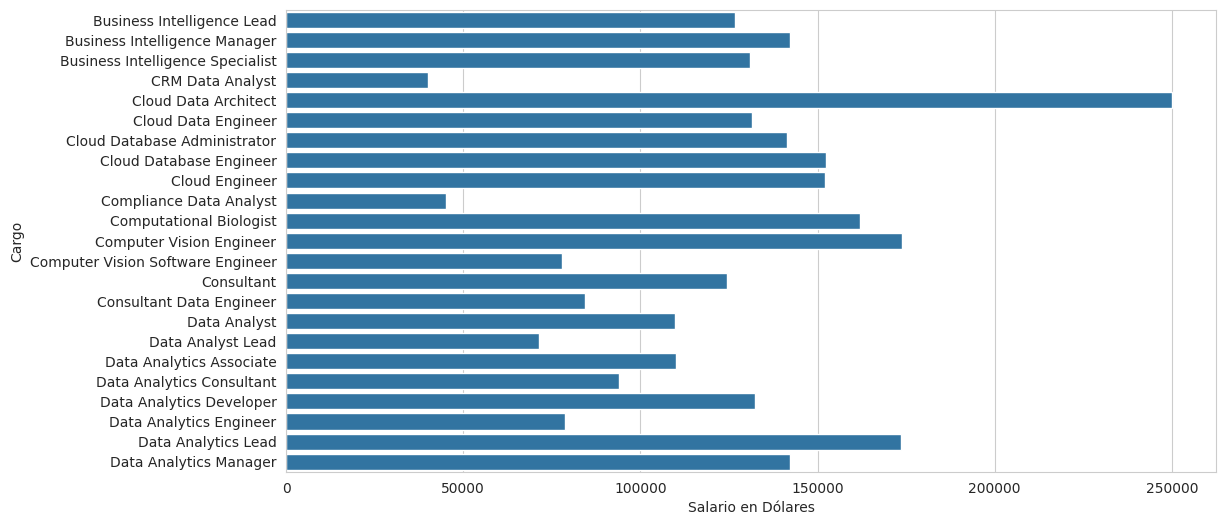

In [50]:
# Convert the Series to DataFrame and reset the index
salarios3 = salarios3.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios3);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

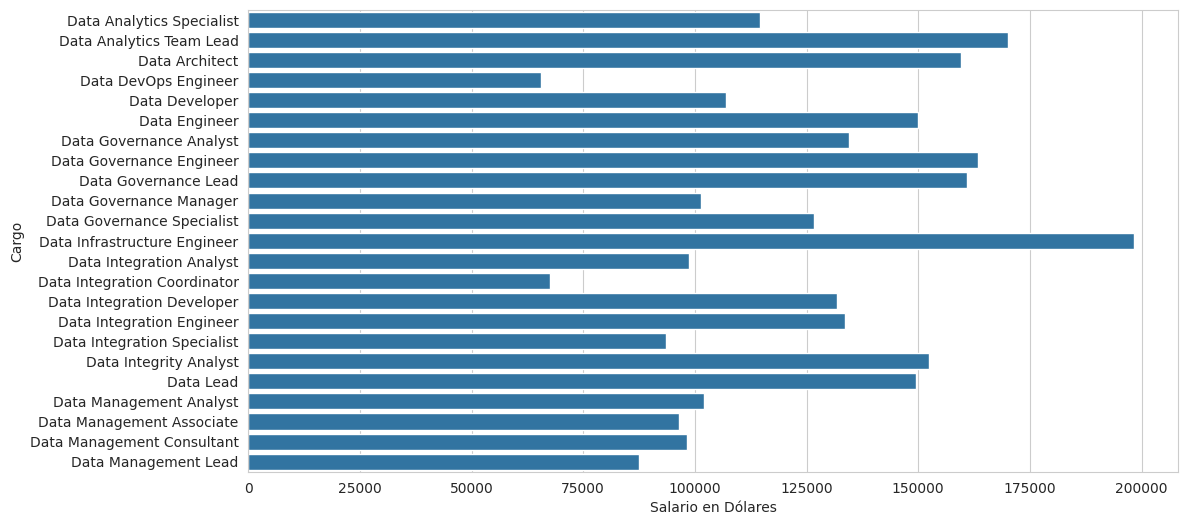

In [51]:
# Convert the Series to DataFrame and reset the index
salarios4 = salarios4.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios4);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

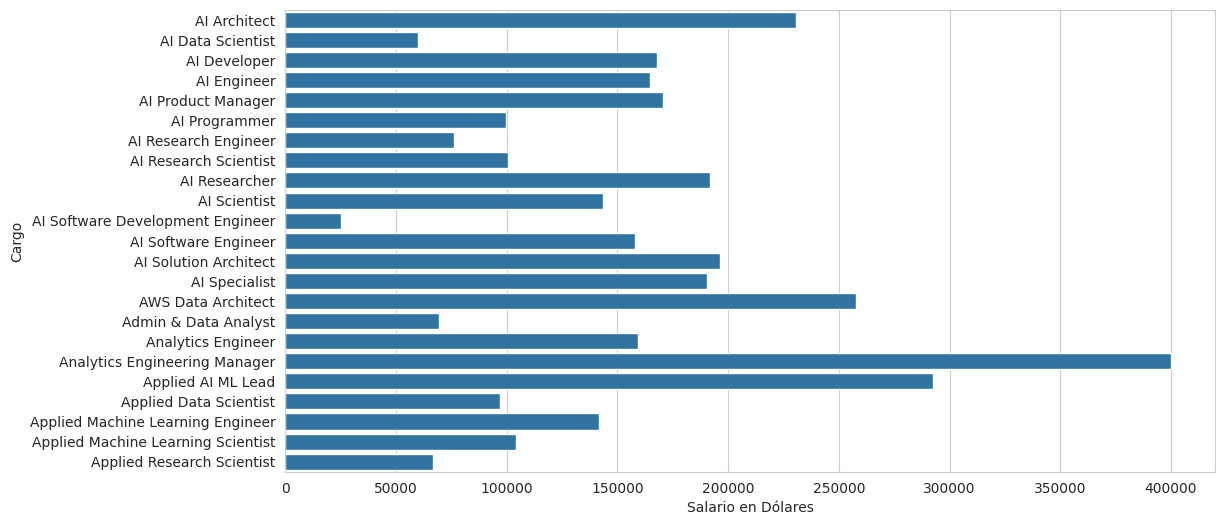

In [52]:
# Convert the Series to DataFrame and reset the index
salarios5 = salarios5.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios1);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

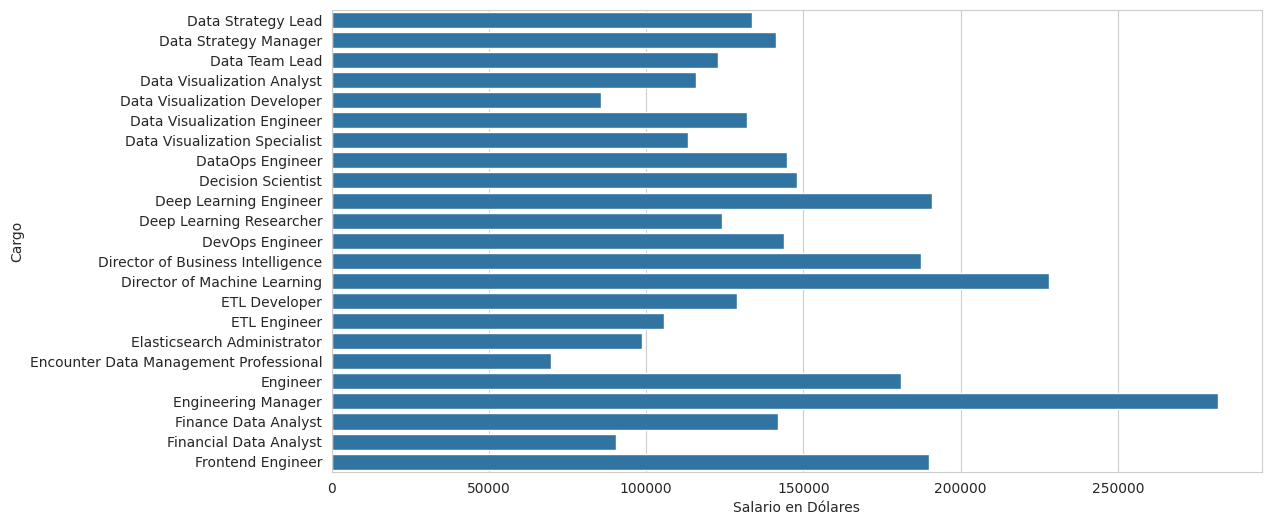

In [53]:
# Convert the Series to DataFrame and reset the index
salarios6 = salarios6.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios6);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

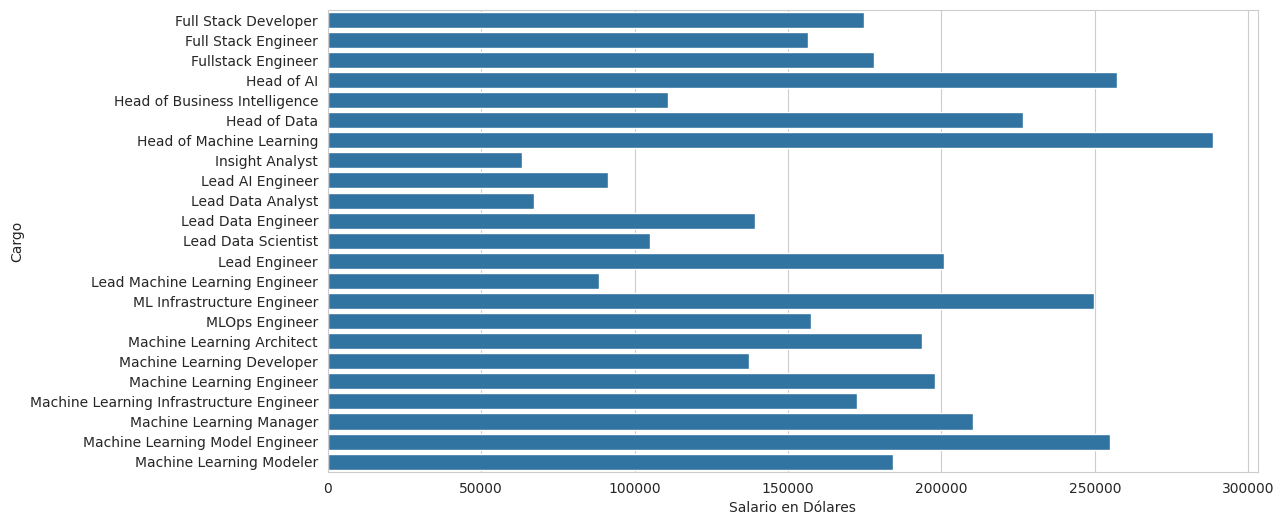

In [54]:
# Convert the Series to DataFrame and reset the index
salarios7 = salarios7.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios7);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

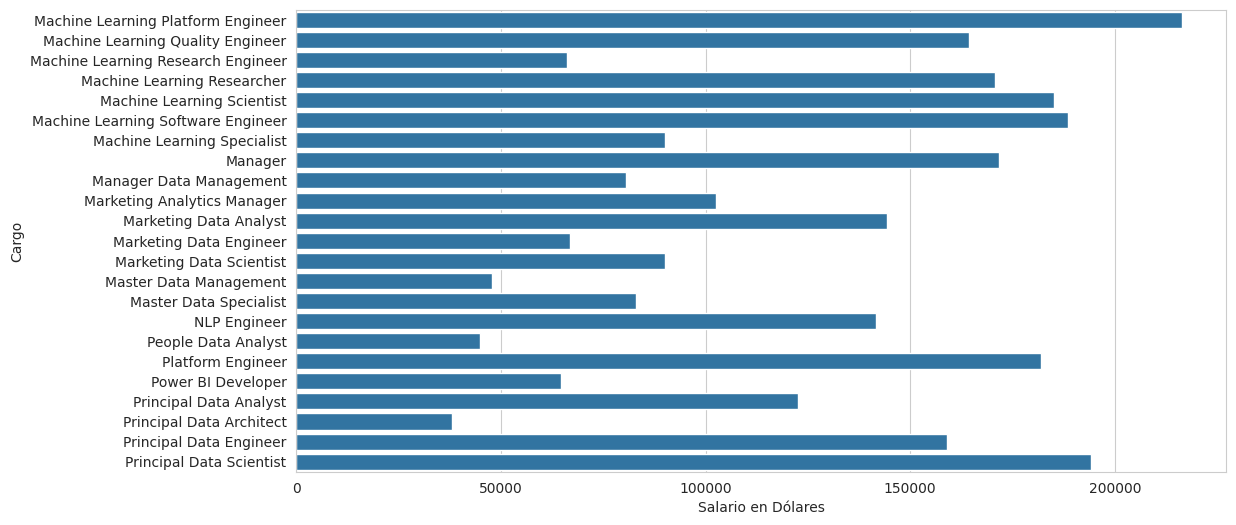

In [55]:
# Convert the Series to DataFrame and reset the index
salarios8 = salarios8.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios8);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

Text(0, 0.5, 'Cargo')

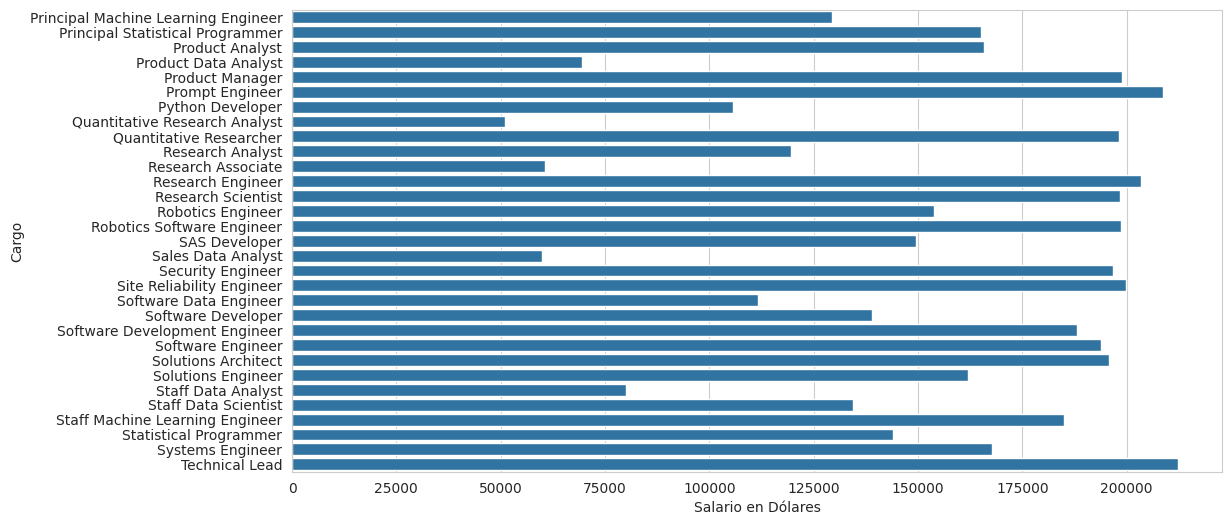

In [56]:
# Convert the Series to DataFrame and reset the index
salarios9 = salarios9.to_frame().reset_index()

#Estilos seaborn
sns.set_style("whitegrid")

#Tamaño de la figura
plt.figure(figsize=(12, 6))

sns.barplot(x='salary_in_usd', y='job_title', data=salarios9);

plt.xlabel('Salario en Dólares')
plt.ylabel('Cargo')

# **Conclusiones**

A lo largo de éste análisis descriptivo hemos estado observando el patrón de comportamiento de los salarios para los más de 215 cargos que le dan las empresas grandes, medianas y pequeñas a los expertos en la ciencia de datos, lo cual involucra diversos niveles de experiencias en más de 90 países.

Las conclusiones más claras son:

+ El máximo salario anual para un profesional en el ecosistema de datos es de 800.000 USD anual.
+ El salario más bajo es de 15.000 USD anual.
+ Los profesionales mejor pagados son los que se involucran con la inteligencia artificial y el *Analitycs Engineer Manager* que en promedio gana 400.000 USD al año.
+ Los países que ofrecen mejor salario son Estados Unidos y Canadá.
+ Entre los que ofrecen peor salario se puede nombrar a Ecuador, Filipinas, Grecia y Armenia.
+ No existe diferencias significativas en cuánto al salario si el trabajo es realizado de forma remota, híbrida o presencial.
+ Sin lugar a dudas el *Analista de Datos* puro o en cualquiera de sus especializaciones es una profesión muy bien pagada en éstos 90 países.
+ Éste estudio puede servir de guía para las empresas que están iniciando a crear cargos en el área de ciencias de datos, le da una guía de cuánto ofrecer de acuerdo a los niveles de experiencia de los expertos.